<a href="https://colab.research.google.com/github/OliwiaP/Python_for_Data_Analysis/blob/master/hist_loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

!pip install git+https://github.com/julianirwin/hloopy.git

!pip install lmfit

  Cloning https://github.com/julianirwin/hloopy.git to /tmp/pip-req-build-v_hqu934
  Running command git clone -q https://github.com/julianirwin/hloopy.git /tmp/pip-req-build-v_hqu934
  Created wheel for hloopy: filename=hloopy-0.0.0.dev0-cp36-none-any.whl size=19259 sha256=a665bc72c8130ee4fa2951fad485b4b81785a18b1349d48e0dcac9de156eb462
  Stored in directory: /tmp/pip-ephem-wheel-cache-1unprha5/wheels/b9/4c/2f/17948870d0861922a37ab5c08eddf724f0585dba2fdc75a1a8
Successfully built hloopy


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loop_H_M_H_M.txt to loop_H_M_H_M (1).txt


In [ ]:
import hloopy as hlpy

datapath = 'loop_H_M_H_M.txt'

df4 = pd.read_csv(datapath, names=("h_u","m_u","h_l","m_l"))
df4.head()

,h_u,m_u,h_l,m_l
0,50000.00,6.460000e-08,-50190.30,0.000003
1,47681.23,5.710000e-06,-47681.23,-0.000004
2,45170.69,1.010000e-05,-45170.69,-0.000009
3,42662.34,1.630000e-05,-42663.08,-0.000014
4,40154.00,2.150000e-05,-40154.00,-0.000016


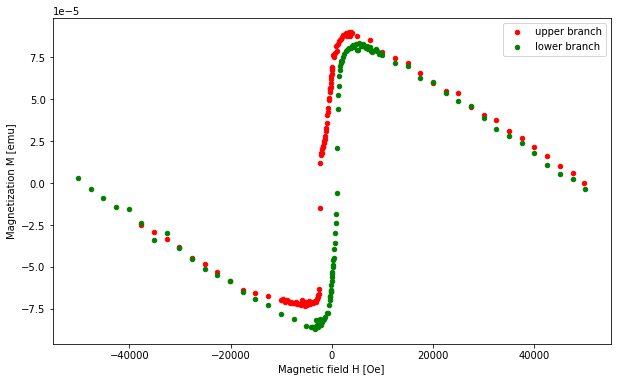

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
df4.plot.scatter(x='h_u', y='m_u', ax=ax, label='upper branch', color='red')
df4.plot.scatter(x='h_l', y='m_l', ax=ax, label='lower branch', color='green')
ax.set_xlabel('Magnetic field H [Oe]')
ax.set_ylabel('Magnetization M [emu]')
ax.legend(loc='best');

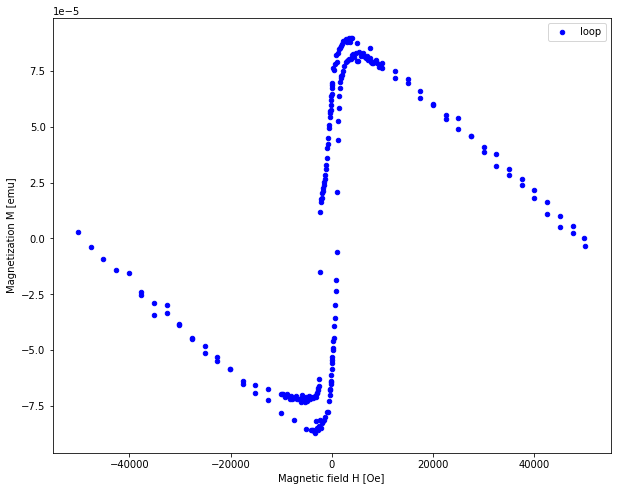

In [ ]:
df2 = pd.concat([pd.DataFrame({'h' : df4.h_u, 'm' : df4.m_u}), pd.DataFrame({'h' : df4.h_l, 'm' : df4.m_l})], ignore_index=True)    # dane z 4 kolumn w 2

fig, ax = plt.subplots(figsize=(10,8))
df2.plot.scatter(x='h', y='m', ax=ax, label='loop', color='blue')
ax.set_xlabel('Magnetic field H [Oe]')
ax.set_ylabel('Magnetization M [emu]')
ax.legend(loc='best');

In [ ]:
df2.to_string()

'               h             m\n0    50000.00000  6.460000e-08\n1    47681.23000  5.710000e-06\n2    45170.69000  1.010000e-05\n3    42662.34000  1.630000e-05\n4    40154.00000  2.150000e-05\n5    37645.65000  2.680000e-05\n6    35135.84000  3.090000e-05\n7    32626.76000  3.770000e-05\n8    30116.96000  4.080000e-05\n9    27608.61000  4.570000e-05\n10   25100.26000  5.390000e-05\n11   22588.99000  5.510000e-05\n12   20081.37000  5.990000e-05\n13   17570.84000  6.590000e-05\n14   15060.01000  7.160000e-05\n15   12550.64000  7.490000e-05\n16   10041.86000  7.850000e-05\n17    7530.29600  8.520000e-05\n18    5018.88500  8.770000e-05\n19    4015.40000  8.970000e-05\n20    3814.74600  8.990000e-05\n21    3614.02000  8.790000e-05\n22    3413.36700  8.990000e-05\n23    3212.56700  8.870000e-05\n24    3011.69600  8.790000e-05\n25    2811.04200  8.930000e-05\n26    2610.31600  8.840000e-05\n27    2409.59000  8.850000e-05\n28    2208.79100  8.840000e-05\n29    2008.13700  8.690000e-05\n30    1

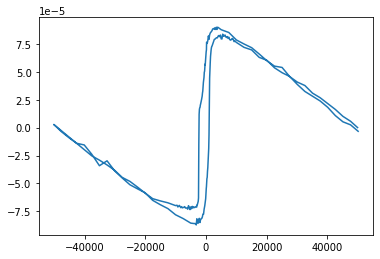

In [ ]:
# Create an HLoop object, the wrapper around a datafile
hl = hlpy.HLoop(io.StringIO(df2.to_string()), delim_whitespace=True)

# Indicate which columns are the x and y data (stimulus and response).
hl.setas(x=0, y=1)

# fix for old pandas version
hl.df.ix = hl.df.iloc

fig, ax = plt.subplots()
hl.plot(ax=ax)

/usr/local/lib/python3.6/dist-packages/hloopy/extract.py:94: RuntimeWarning: Mean of empty slice.
  Hc_avgs = [x[i - avg_width:i + avg_width].mean() for i in hc_indices]
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


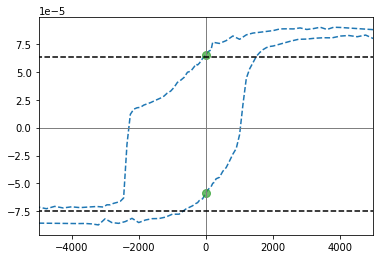

In [ ]:
# Now compute the coercivity, remanence and saturation:
from hloopy.extract import Coercivity, Remanence, Saturation
fig, ax = plt.subplots()
hl.plot(ax, ls='--')
extracts = (Coercivity, Remanence, Saturation)
for e in extracts:
    e(hl).plot(ax)

plt.xlim(-5000, 5000)
plt.axhline(linewidth=1, color='grey') 
plt.axvline(linewidth=1, color='grey') 

print()

In [ ]:
print(Coercivity)

<class 'hloopy.extract.Coercivity'>


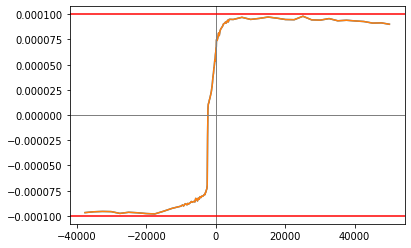

In [ ]:
from hloopy.transformations import  flatten_saturation, normalize, center

h,m = flatten_saturation(x=df2.h, y=df2.m, threshold=df2.h.iloc[10])

hu,mu = flatten_saturation(x=df4.h_u, y=df4.m_u, threshold=df4.h_u.iloc[30])
hl,ml = flatten_saturation(x=df4.h_l, y=df4.m_l, threshold=df4.h_l.iloc[90])

huc, muc = center(hu, mu)

hlc, mlc = center(hl, ml)

plt.plot(hu,mu)
plt.plot(huc,muc)
#plt.xlim(-5000, 5000)
plt.axhline(linewidth=1, color='grey') 
plt.axvline(linewidth=1, color='grey') 
plt.axhline(0.0001,c='r')
plt.axhline(-0.0001,c='r')

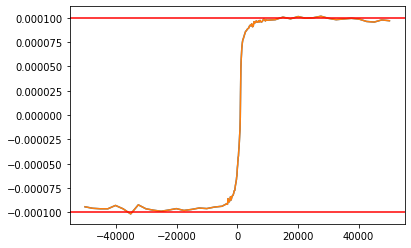

In [ ]:
plt.plot(hl,ml)
plt.plot(hlc,mlc)
plt.axhline(0.0001,c='r')
plt.axhline(-0.0001,c='r')

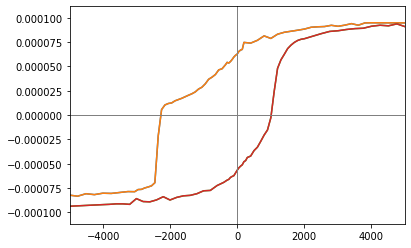

In [ ]:
plt.plot(hu,mu)
plt.plot(huc,muc)
plt.plot(hl,ml)
plt.plot(hlc,mlc)
plt.xlim(-5000, 5000)
plt.axhline(linewidth=1, color='grey') 
plt.axvline(linewidth=1, color='grey') 

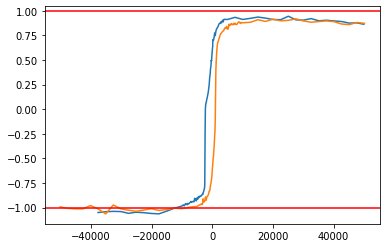

In [ ]:
hun, mun = normalize( x=hu, y=mu, ylim=1.0, n_avg=25)    # dobrzeby to troche poprawic

hln, mln = normalize( x=hl, y=ml, ylim=1.0, n_avg=25)    #

plt.plot(hun,mun)
plt.plot(hln,mln)
plt.axhline(1.0,c='r')
plt.axhline(-1.0,c='r')
#plt.xlim(-5000, 5000)
#plt.axhline(linewidth=1, color='grey') 
#plt.axvline(linewidth=1, color='grey') 

In [ ]:
from lmfit import Parameters, Model
pars = Parameters()
pars.add('M1', value=0.1, min=0, max=1)
pars.add('M2', expr='1-M1')
pars.add('g1', value=0.01)
pars.add('g2', value=0.001)
pars.add('H1', value=1000)
pars.add('H2', value=200)

In [ ]:
def f(x, M1, g1, H1, M2, g2, H2):
    f1 = 2.0 / np.pi * M1 * np.arctan(g1*(x-H1))
    f2 = 2.0 / np.pi * M2 * np.arctan(g2*(x-H2))
    return (f1 + f2)

mod = Model(f)

In [ ]:
result = mod.fit(mln, x=hln, params=pars)
print(result.fit_report())

[[Model]]
    Model(f)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 114
    # data points      = 116
    # variables        = 5
    chi-square         = 0.36370843
    reduced chi-square = 0.00327665
    Akaike info crit   = -658.739182
    Bayesian info crit = -644.971231
[[Variables]]
    M1:  0.28791205 +/- 0.08026995 (27.88%) (init = 0.1)
    M2:  0.71208795 +/- 0.08026995 (11.27%) == '1-M1'
    g1:  0.02166953 +/- 0.02231290 (102.97%) (init = 0.01)
    g2:  0.00112492 +/- 1.3705e-04 (12.18%) (init = 0.001)
    H1:  1091.49648 +/- 19.8648328 (1.82%) (init = 1000)
    H2:  853.696225 +/- 49.6901278 (5.82%) (init = 200)
[[Correlations]] (unreported correlations are < 0.100)
    C(M1, g2) = -0.919
    C(M1, g1) = -0.891
    C(M1, H2) = -0.754
    C(g1, g2) =  0.746
    C(g2, H2) =  0.662
    C(g1, H2) =  0.619
    C(g1, H1) =  0.561
    C(M1, H1) = -0.505
    C(g2, H1) =  0.483
    C(H1, H2) =  0.138


(-5000.0, 5000.0)

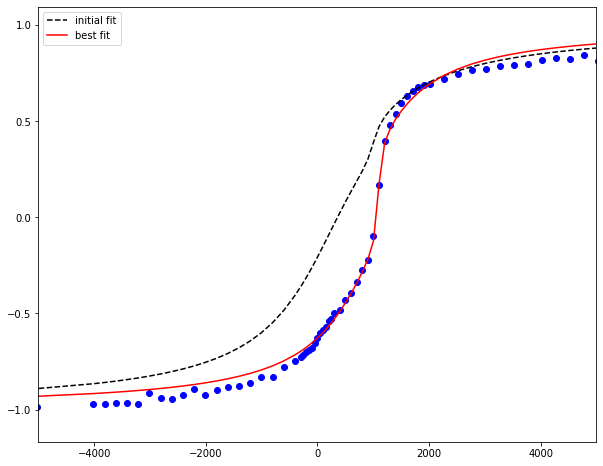

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))    # tylko rozmiar wykresu, zeby bylo cos widac

plt.plot(hln, mln, 'bo')
plt.plot(hln, result.init_fit, 'k--', label='initial fit')
plt.plot(hln, result.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.xlim(-5000, 5000)

In [ ]:
pars.add('M3', expr='M1')
pars.add('M4', expr='M2')
pars.add('g3', expr='g1')
pars.add('g4', expr='g2')
pars.add('H3', value=-2350)
pars.add('H4', expr='H2')

In [ ]:
def fu(x, M3, g3, H3, M4, g4, H4):
    f3 = 2.0 / np.pi * M3 * np.arctan(g3*(x-H3))
    f4 = 2.0 / np.pi * M4 * np.arctan(g4*(x-H4))
    return (f3 + f4)

modu = Model(fu)

result2 = modu.fit(mun, x=hun, params=pars)
print(result2.fit_report())

[[Model]]
    Model(fu)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 58
    # data points      = 116
    # variables        = 6
    chi-square         = 0.17434595
    reduced chi-square = 0.00158496
    Akaike info crit   = -742.035256
    Bayesian info crit = -725.513715
##  Warning: uncertainties could not be estimated:
    H1:  at initial value
[[Variables]]
    M1:  0.42882700 (init = 0.1)
    M2:  0.57117300 == '1-M1'
    g1:  0.05646273 (init = 0.01)
    g2:  9.6077e-04 (init = 0.001)
    H1:  1000.00000 (init = 1000)
    H2: -493.047030 (init = 200)
    M3:  0.42882700 == 'M1'
    M4:  0.57117300 == 'M2'
    g3:  0.05646273 == 'g1'
    g4:  9.6077e-04 == 'g2'
    H3: -2366.90683 (init = -2350)
    H4: -493.047030 == 'H2'


(-5000.0, 5000.0)

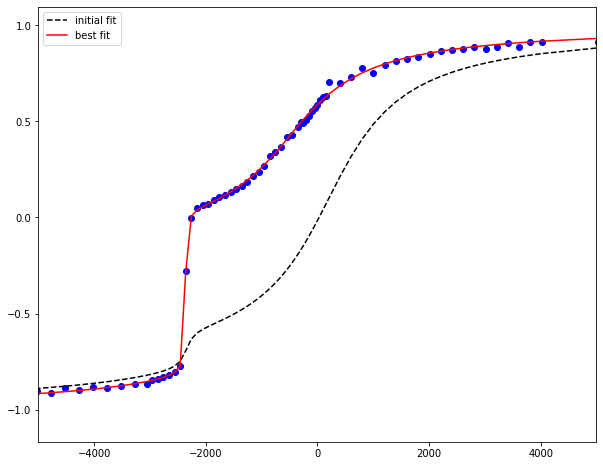

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

plt.plot(hun, mun, 'bo')
plt.plot(hun, result2.init_fit, 'k--', label='initial fit')
plt.plot(hun, result2.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.xlim(-5000, 5000)

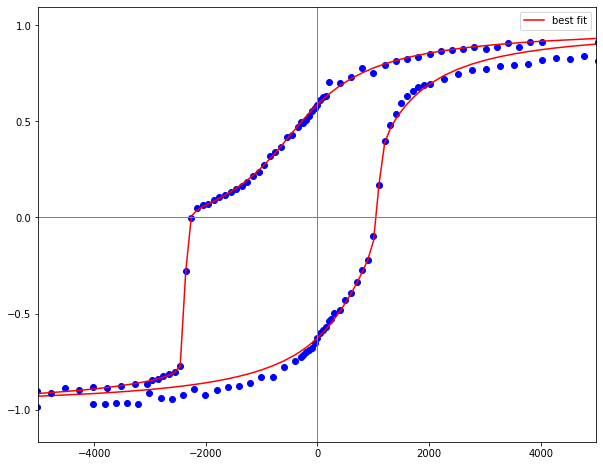

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

plt.plot(hln, mln, 'bo')
plt.plot(hln, result.best_fit, 'r-', label='best fit')
plt.plot(hun, mun, 'bo')
plt.plot(hun, result2.best_fit, 'r-')
plt.legend(loc='best')

plt.xlim(-5000, 5000)
plt.axhline(linewidth=1, color='grey') 
plt.axvline(linewidth=1, color='grey') 